In [1]:
## The Data Incubator Challenge - Q2: UK Vehicle Accidents
# October 26, 2017
# Molly Gibson

# data from https://data.gov.uk/dataset/road-accidents-safety-data


import pandas as pd
import numpy as np
from column_report import get_column_report

# setup format
pd.set_option('display.float_format', lambda x: '%.10f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

accidents_df = pd.read_csv('datasets/Accidents0514.csv', low_memory=False)
casualties_df = pd.read_csv('datasets/Casualties0514.csv', low_memory=False)
vehicles_df = pd.read_csv('datasets/Vehicles0514.csv', low_memory=False)

# create a dictionary to lookup what codes mean
data_dict = pd.read_excel('datasets/Road-Accident-Safety-Data-Guide.xls', sheetname=None)

In [10]:
for d in data_dict:
    c = d.replace(' ', '_')
    data_dict[c] = data_dict.pop(d)
  

In [2]:
print('Accident dataframe dimensions: %s' % str(accidents_df.shape))
get_column_report(accidents_df)


Accident dataframe dimensions: (1640597, 32)


,Column Name,Data Type,Unique Count,Sample Value,NaNs/Zeros,% NaN
0,Accident_Index,object,1640597,200501BS00001,0,0.0000000000
29,Urban_or_Rural_Area,int64,3,1,0,0.0000000000
24,Light_Conditions,int64,5,1,0,0.0000000000
17,Speed_limit,int64,8,30,0,0.0000000000
16,Road_Type,int64,6,6,0,0.0000000000
5,Police_Force,int64,51,1,0,0.0000000000
6,Accident_Severity,int64,3,2,0,0.0000000000
7,Number_of_Vehicles,int64,27,1,0,0.0000000000
8,Number_of_Casualties,int64,50,1,0,0.0000000000
9,Date,object,3652,04/01/2005,0,0.0000000000


In [3]:
print('Casualties dataframe dimensions: %s' % str(casualties_df.shape))
get_column_report(casualties_df)

Casualties dataframe dimensions: (2216720, 15)


,Column Name,Data Type,Unique Count,Sample Value,NaNs/Zeros,% NaN
0,Accident_Index,object,1640597,200501BS00001,0,0.0000000000
1,Vehicle_Reference,int64,67,1,0,0.0000000000
2,Casualty_Reference,int64,97,1,0,0.0000000000
3,Casualty_Class,int64,3,3,0,0.0000000000
7,Casualty_Severity,int64,3,2,0,0.0000000000
13,Casualty_Type,int64,21,0,0,0.0000000000
8,Pedestrian_Location,int64,12,1,12,0.0000000000
9,Pedestrian_Movement,int64,11,1,15,0.0000000000
11,Bus_or_Coach_Passenger,int64,6,0,38,0.0000000000
10,Car_Passenger,int64,4,0,404,0.0200000000


In [4]:
get_column_report(vehicles_df)

,Column Name,Data Type,Unique Count,Sample Value,NaNs/Zeros,% NaN
0,Accident_Index,object,1640597,200501BS00001,0,0.0000000000
1,Vehicle_Reference,int64,68,1,0,0.0000000000
14,Sex_of_Driver,int64,4,2,33,0.0000000000
10,Hit_Object_off_Carriageway,int64,13,0,54,0.0000000000
5,Vehicle_Location-Restricted_Lane,int64,11,0,74,0.0000000000
8,Hit_Object_in_Carriageway,int64,13,0,87,0.0000000000
9,Vehicle_Leaving_Carriageway,int64,10,0,127,0.0000000000
7,Skidding_and_Overturning,int64,7,0,132,0.0000000000
3,Towing_and_Articulation,int64,7,0,184,0.0100000000
2,Vehicle_Type,int64,21,9,473,0.0200000000


In [7]:
########## testing ############
# nans = accidents_df['2nd_Road_Class'].isnull().sum()
# nans += len(accidents_df[accidents_df['2nd_Road_Class']==-1])
# print(len(accidents_df) - nans)

# print(accidents_df.Urban_or_Rural_Area.unique())

# print(casualties_df.Accident_Index[0:10])
# casualties_df[casualties_df.Accident_Index=='200501BS00010']

In [9]:
print(data_dict['Urban_Rural'])


   code        label
0     1        Urban
1     2        Rural
2     3  Unallocated


In [8]:
# What fraction of accidents occur in urban areas?
# urban areas have Urban_or_rural==1 
def percent_urban(df):
    pct_urb = len(df[df.Urban_or_Rural_Area==1]) \
                / float(len(df))
    return pct_urb

# we only want 10 digits of precision (and 0. takes up two characters, thus :12)
print(str(percent_urban(accidents_df))[:12])

0.6426569108


In [6]:
# When is the most dangerous time to drive?
# Find hour with highest occurance of fatal accidents, normalized by the total number of accidents

  
# let's see where we can get info about fatalities/injuries:
for d in data_dict: 
    if 'Casualty' in d:
        print(d, '\n','-'*10)
        print(data_dict[d], '\n')



Casualty Type 
 ----------
    code                                              label
0      0                                         Pedestrian
1      1                                            Cyclist
2      2       Motorcycle 50cc and under rider or passenger
3      3      Motorcycle 125cc and under rider or passenger
4      4  Motorcycle over 125cc and up to 500cc rider or...
5      5           Motorcycle over 500cc rider or passenger
6      8                     Taxi/Private hire car occupant
7      9                                       Car occupant
8     10          Minibus (8 - 16 passenger seats) occupant
9     11      Bus or coach occupant (17 or more pass seats)
10    16                                        Horse rider
11    17                      Agricultural vehicle occupant
12    18                                      Tram occupant
13    19  Van / Goods vehicle (3.5 tonnes mgw or under) ...
14    20  Goods vehicle (over 3.5t. and under 7.5t.) occ...
15    21   Go

In [57]:
# so casualty_severity will tell us whether or not it was a fatal accident
# for this question, we want to count the number of accidents in which Casualty_Severity==1
# and so let's groupby accident_id in the casualties_df, then count 

# maybe I can take a list of the fatal accident indices
# and then get their time info, etc. from the accident_df
# and also get the total accidents info
fatal_accidents = casualties_df[casualties_df.Casualty_Severity==1].Accident_Index.unique()

#print(fatal_accidents==len(accidents_df[accidents_df.Accident_Severity==1]))
#print(len(accidents_df[accidents_df.Accident_Severity==1]))
# shit so didn't need to use casualties_df at all for this one

print('Number of fatal accidents: %i'
      % len(fatal_accidents))
print('Total number of fatalities: %i' 
     % len(casualties_df[casualties_df.Casualty_Severity==1]))



21382
Number of fatal accidents: 21382
Total number of fatalities: 23072


In [47]:
#fatal_accidents = accidents_df[accidents_df.Accident_Index.isin(list(fatal_accidents))]

fatal_df = accidents_df.copy()

fatal_df = fatal_df[fatal_df['Accident_Index'].isin(fatal_accidents)]

# we only care about the hour so let's just drop everything after that

# oops fuck

def nearest_hour(time):
    return str(time)[:2]

fatal_df.loc[:,'Hour'] = fatal_df.Time.apply(lambda x: nearest_hour(x))


counts_byhour = fatal_df[['Hour', 'Accident_Index']].groupby(['Hour']).count().reset_index() \
                                                .rename(columns={'Accident_Index':'fatal_count'})
    

#fatal_df.head()
# and then let's go back and get the total number of accidents for each hour
accidents_df.loc[:,'Hour'] = accidents_df.Time.apply(lambda x: nearest_hour(x))

# and add that to the hourly counts dataframe
counts_byhour.loc[:,'total_count'] = accidents_df[['Hour', 'Accident_Index']] \
                                            .groupby(['Hour']).count().reset_index().Accident_Index
    



# need to change this now
pd.set_option('display.float_format', lambda x: '%.10f' % x)

counts_byhour.loc[:,'percent_fatal'] = 100*counts_byhour.fatal_count / counts_byhour.total_count

# 24 is the na column
#counts = 
counts_byhour = counts_byhour.drop(24)
counts_byhour.sort_values('percent_fatal', ascending=False).head()
# 4 am is the most dangerous time to drive; not so surprising. predictably, the most dangerous times 
# are all in the early morning hours

,Hour,fatal_count,total_count,percent_fatal
4,04,360,9117,3.9486673248
3,03,450,11910,3.7783375315
2,02,527,14907,3.5352518951
1,01,613,18508,3.3120812622
5,05,425,13135,3.2356299962


In [22]:
counts_byhour.Hour = pd.to_numeric(counts_byhour.Hour)

# answer to submit on challenge form:
str(counts_byhour.percent_fatal[counts_byhour.Hour==4].item()/100)[:12]

'0.0394866732'

<Container object of 24 artists>

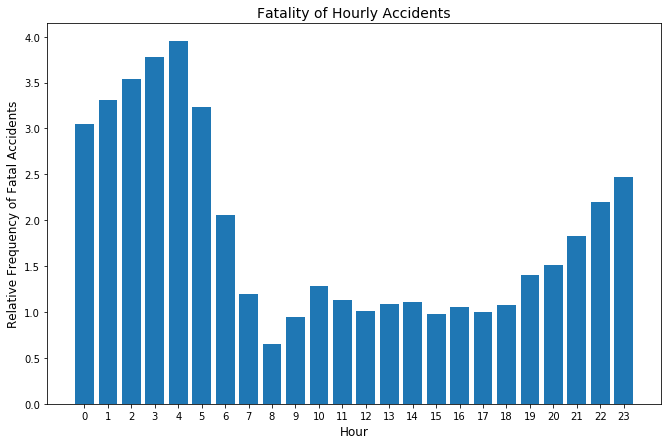

In [23]:
import matplotlib.pyplot as plt

import plotly.plotly as py

%matplotlib inline

fig=plt.figure(figsize=(11, 7), facecolor='w', edgecolor='k')



plt.xticks(counts_byhour.Hour)
plt.ylabel('Relative Frequency of Fatal Accidents', size=12)
plt.xlabel('Hour', size=12)
plt.title('Fatality of Hourly Accidents', size=14)
plt.bar(counts_byhour.Hour, counts_byhour.percent_fatal)

#counts.fatal_count.div(counts.total_count.apply(lambda x: float(x)), axis='index')

In [26]:
# There seems to be a linear trend in the number of accidents that occur each year. What is that trend?

# so we'll want to count the number of accidents per year and then run a linear regression

# first thing we want to do is extract just the year from the Date column

accidents_df.loc[:, 'Date'] = pd.to_datetime(accidents_df['Date'], errors='coerce')
accidents_df.loc[:, 'Year'] = accidents_df['Date'].dt.year

<Container object of 10 artists>

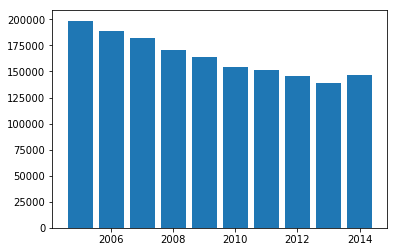

In [39]:
annual_counts = accidents_df[['Year', 'Accident_Index']].groupby(['Year']).count().reset_index() \
                                                .rename(columns={'Accident_Index':'fatal_count'})
    
plt.bar(annual_counts.Year, annual_counts.fatal_count)

In [43]:
# # importing statsmodels to run a linear regression and find linear trend in number of 
# # accidents per year
# import statsmodels.formula.api as sm

# annual_counts.fatal_count = sm.add_constant(annual_counts.fatal_count)


# res = sm.ols(annual_counts.fatal_count, annual_counts.Year).fit()
# print(res.params)

Change in number of accidents per year: -6511.7272727273


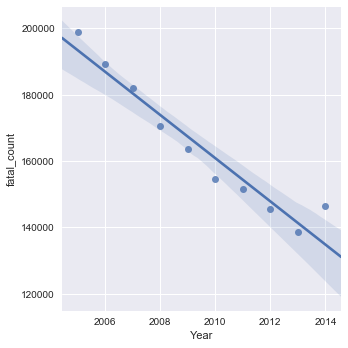

In [49]:
from sklearn import linear_model
import seaborn as sns

X = annual_counts[["Year"]]
y = annual_counts["fatal_count"]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print('Change in number of accidents per year: %.10f' % results.coef_)
sns.lmplot(x="Year", y="fatal_count", data=annual_counts)
sns.plt.show()

In [75]:
# Do accidents in high-speed-limit areas have more casualties? Compute the Pearson correlation
# coefficient between the speed limit and the ratio of the number of casualties (! note 
# that it's number of casualties and not number of fatal accidents) to accidents for 
# each speed limit
print('Unique speed limits in the dataset: ', accidents_df.Speed_limit.unique())

#print(accidents_df.columns)

# first get a count of the number of accidents in each speed limit
counts_byspeed = accidents_df[['Speed_limit', 'Accident_Index']].groupby(['Speed_limit']) \
                                                .count().reset_index() \
                                                .rename(columns={'Accident_Index':'accident_count'})

# 
counts_byspeed.loc[:,'num_casualties'] = accidents_df[['Speed_limit', 'Number_of_Casualties']] \
                                                    .groupby(['Speed_limit']).sum() \
                                                    .reset_index()['Number_of_Casualties']

        
counts_byspeed.loc[:, 'casualty_ratio'] = counts_byspeed.num_casualties / counts_byspeed.accident_count
counts_byspeed
# yep - areas with higher speed limits have more casualties per accident


Unique speed limits in the dataset:  [30 40 50 20 60 70 10 15]


,Speed_limit,accident_count,num_casualties,casualty_ratio
0,10,17,20,1.1764705882
1,15,16,18,1.1250000000
2,20,17727,20845,1.1758898855
3,30,1051982,1335346,1.2693620233
4,40,134488,193141,1.4361206948
5,50,52880,79606,1.5054084720
6,60,263282,399132,1.5159866607
7,70,120205,188612,1.5690861445


In [78]:
print('Pearson correlation between speed limit and casualty ratio: ',
      str(counts_byspeed.Speed_limit.corr(counts_byspeed.casualty_ratio))[:12])

Pearson correlation between speed limit and casualty ratio:  0.9659390555


In [86]:
# How many time more likely are accidents involving male car drivers to be fatal compared
# to accidents involving female drivers?

print(vehicles_df.Sex_of_Driver.unique())
print(data_dict['Sex_of_Driver'])
print(data_dict['Vehicle_Type'])
# ignore accidents where the driver wasn't driving a car
# so Vehicle_Type==8 or 9

[ 2  1  3 -1]
   code                         label
0     1                          Male
1     2                        Female
2     3                     Not known
3    -1  Data missing or out of range
    code                                  label
0      1                            Pedal cycle
1      2              Motorcycle 50cc and under
2      3             Motorcycle 125cc and under
3      4  Motorcycle over 125cc and up to 500cc
4      5                  Motorcycle over 500cc
5      8                  Taxi/Private hire car
6      9                                    Car
7     10       Minibus (8 - 16 passenger seats)
8     11   Bus or coach (17 or more pass seats)
9     16                           Ridden horse
10    17                   Agricultural vehicle
11    18                                   Tram
12    19    Van / Goods 3.5 tonnes mgw or under
13    20        Goods over 3.5t. and under 7.5t
14    21          Goods 7.5 tonnes mgw and over
15    22                    